# 09-04-2025

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Preparation

In [82]:
df = pd.read_csv('handlingallmissingvalues_df.csv') 

In [83]:
outliers = pd.read_csv('outlier_dataset.csv') 

In [84]:

# Dùng phương pháp merge để tìm các dòng giống nhau giữa df và outliers
merged_df = pd.merge(df, outliers, how='left', indicator=True)

# Lọc ra những dòng mà không có trong outliers
df_cleaned = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# df_cleaned là DataFrame đã loại bỏ các dòng giống nhau với outliers


In [85]:
df_cleaned = df_cleaned.drop(columns = ['originalTitle', 'averageRating'])

## Encode

In [86]:
categorical_cols = ['titleType', 'genres', 'continent', 'regions', 'soundMixes']
from sklearn.preprocessing import LabelEncoder
# Create a dictionary to store encoders (useful if you want to inverse-transform later)
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))  # convert to string in case of NaNs
    encoders[col] = le

In [87]:
df_cleaned['canHaveEpisodes'] = df_cleaned['canHaveEpisodes'].replace({True: 1, False: 0})
df_cleaned['isRatable'] = df_cleaned['isRatable'].replace({True: 1, False: 0})

C:\Users\manht\AppData\Local\Temp\ipykernel_12224\3854362560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['canHaveEpisodes'] = df_cleaned['canHaveEpisodes'].replace({True: 1, False: 0})
C:\Users\manht\AppData\Local\Temp\ipykernel_12224\3854362560.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['isRatable'] = df_cleaned['isRatable'].replace({True: 1, False: 0})


In [88]:
df_cleaned['isRatable']

0         1
1         1
2         1
3         1
4         1
         ..
149526    1
149527    1
149528    1
149529    1
149530    1
Name: isRatable, Length: 147990, dtype: int64

## Quy đổi giá trị rating

In [89]:
rating_mapping = {
    '(0, 1]': 0,
    '(1, 2]': 1,
    '(2, 3]': 2,
    '(3, 4]': 3,
    '(4, 5]': 4,
    '(5, 6]': 5,
    '(6, 7]': 6,
    '(7, 8]': 7,
    '(8, 9]': 8,
    '(9, 10]': 9
}

# Quy đổi cột rating
df_cleaned['rating'] = df_cleaned['rating'].replace(rating_mapping)

C:\Users\manht\AppData\Local\Temp\ipykernel_12224\31428942.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['rating'] = df_cleaned['rating'].replace(rating_mapping)


In [90]:
df_cleaned

,rating,startYear,endYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,totalCredits,...,castNumber,companiesNumber,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
0,5,1894,1895.0,1.0,0,1,10,2,0,4,...,1,3,6516,9,0,1,162,0,30,0.0
1,5,1892,1893.0,12.0,0,1,10,2,0,2,...,0,0,13817,3,0,1,162,0,28,0.0
2,4,1894,1895.0,1.0,0,1,10,1,0,1,...,0,1,21582,4,0,1,162,0,30,0.0
3,5,1894,1895.0,1.0,1,1,10,3,0,4,...,1,6,21191,6,0,1,162,0,30,1.0
4,7,1896,1897.0,1.0,0,1,10,12,0,11,...,6,5,13839,21,0,2,162,0,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,6,1993,1994.0,96.0,0,1,10,0,0,11,...,0,2,5019,1,1,1,148,0,52,0.0
149527,6,2019,2020.0,14.0,0,1,10,4,1,52,...,6,3,8580,5,1,1,187,0,28,0.0
149528,5,2019,2020.0,30.0,0,1,10,2,3,32,...,1,0,24654,0,0,0,187,0,30,0.0
149529,7,2011,2012.0,10.0,0,1,10,1,0,15,...,7,0,24654,0,3,1,187,0,30,0.0


## Gán nhãn và áp Z-score

In [91]:
X = df_cleaned.drop(columns='rating').values
y = df_cleaned['rating'].values

In [92]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Data Partitiopning

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

X_train.shape

# Classification

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.35646552695001915
F1-score [0.20338983 0.11042945 0.05997392 0.13650374 0.21007095 0.2810983
 0.35919034 0.47581351 0.31134269 0.23735225]
              precision    recall  f1-score   support

           0      0.182     0.231     0.203        26
           1      0.097     0.128     0.110       141
           2      0.055     0.065     0.060       352
           3      0.124     0.151     0.137      1026
           4      0.197     0.224     0.210      2705
           5      0.271     0.293     0.281      6334
           6      0.357     0.361     0.359     11565
           7      0.480     0.472     0.476     14400
           8      0.329     0.296     0.311      6568
           9      0.301     0.196     0.237      1280

    accuracy                          0.356     44397
   macro avg      0.239     0.242     0.239     44397
weighted avg      0.360     0.356     0.358     44397



In [97]:
from sklearn.neighbors import KNeighborsClassifier
# Tạo đối tượng KNN classifier
clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# In kết quả
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.394666306281956
F1-score [0.         0.07741935 0.02173913 0.06728343 0.21165049 0.31603893
 0.37936854 0.5292674  0.21322399 0.17241379]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.429     0.043     0.077       141
           2      0.250     0.011     0.022       352
           3      0.245     0.039     0.067      1026
           4      0.308     0.161     0.212      2705
           5      0.341     0.295     0.316      6334
           6      0.362     0.398     0.379     11565
           7      0.446     0.651     0.529     14400
           8      0.326     0.158     0.213      6568
           9      0.407     0.109     0.172      1280

    accuracy                          0.395     44397
   macro avg      0.311     0.187     0.199     44397
weighted avg      0.375     0.395     0.367     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Feature Importance

In [20]:
feature_names = df_cleaned.drop(columns='rating').columns
importances = pd.Series(clf.feature_importances_, index=feature_names)
important_features = importances.sort_values(ascending=False)

# To print all
for col, imp in important_features.items():
    print(f"{col}: {imp:.5f}")

ratingCount: 0.12905
totalCredits: 0.10534
genres: 0.08728
castNumber: 0.08239
runtimeMinutes: 0.07328
endYear: 0.06398
startYear: 0.05886
titleType: 0.05701
companiesNumber: 0.05258
regions: 0.05197
totalImages: 0.04685
writerCredits: 0.03662
externalLinks: 0.03345
numRegions: 0.02317
userReviewsTotal: 0.02181
continent: 0.01639
directorsCredits: 0.01372
criticReviewsTotal: 0.01174
quotesTotal: 0.00904
ratewinningawards: 0.00736
soundMixes: 0.00646
awardNominationsExcludeWins: 0.00472
awardWins: 0.00303
totalVideos: 0.00280
canHaveEpisodes: 0.00058
isAdult: 0.00052
isRatable: 0.00000
bestRating: 0.00000
worstRating: 0.00000


# Feature Selection

In [27]:
np.histogram(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])

(array([ 3,  0,  0,  0,  0,  1,  0,  0,  5, 20], dtype=int64),
 array([0.        , 0.11055701, 0.22111402, 0.33167104, 0.44222805,
        0.55278506, 0.66334207, 0.77389909, 0.8844561 , 0.99501311,
        1.10557012]))

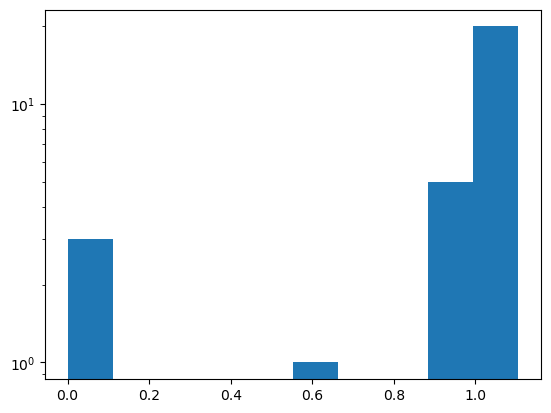

In [28]:
plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14])
plt.yscale('log')
plt.show()

## Test lại cho Decision tree và KNN

CHỌN PHƯƠNG SAI Ở MỨC 1

In [29]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 1)
X_train_sel = sel.fit_transform(X_train)
X_test_sel = sel.transform(X_test)

X_train.shape, X_train_sel.shape, X_test_sel.shape

((103593, 29), (103593, 12), (44397, 12))

In [30]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.32135054170326827
F1-score [0.19178082 0.08955224 0.04048583 0.10715781 0.17120356 0.25639464
 0.33402411 0.43610975 0.26021205 0.1740458 ]
              precision    recall  f1-score   support

           0      0.149     0.269     0.192        26
           1      0.077     0.106     0.090       141
           2      0.039     0.043     0.040       352
           3      0.094     0.125     0.107      1026
           4      0.159     0.185     0.171      2705
           5      0.248     0.266     0.256      6334
           6      0.327     0.341     0.334     11565
           7      0.441     0.432     0.436     14400
           8      0.283     0.241     0.260      6568
           9      0.250     0.134     0.174      1280

    accuracy                          0.321     44397
   macro avg      0.207     0.214     0.206     44397
weighted avg      0.325     0.321     0.322     44397



In [31]:
clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3687411311575106
F1-score [0.         0.01369863 0.00560224 0.07672188 0.14873765 0.2625714
 0.35713437 0.50352046 0.17056784 0.12410189]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.200     0.007     0.014       141
           2      0.200     0.003     0.006       352
           3      0.364     0.043     0.077      1026
           4      0.289     0.100     0.149      2705
           5      0.323     0.221     0.263      6334
           6      0.329     0.390     0.357     11565
           7      0.414     0.643     0.504     14400
           8      0.296     0.120     0.171      6568
           9      0.378     0.074     0.124      1280

    accuracy                          0.369     44397
   macro avg      0.279     0.160     0.166     44397
weighted avg      0.349     0.369     0.334     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy giảm => mất nhiều dữ liệu quá, giảm quy tác chọn xuống 0.9

In [32]:
sel = VarianceThreshold(threshold = 0.9)
X_train_sel = sel.fit_transform(X_train)
X_test_sel = sel.transform(X_test)

X_train.shape, X_train_sel.shape, X_test_sel.shape

((103593, 29), (103593, 25), (44397, 25))

In [33]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3563979548167669
F1-score [0.19672131 0.09411765 0.06587615 0.13737734 0.20888355 0.2789002
 0.35821665 0.47639035 0.31434311 0.2319538 ]
              precision    recall  f1-score   support

           0      0.171     0.231     0.197        26
           1      0.080     0.113     0.094       141
           2      0.061     0.071     0.066       352
           3      0.127     0.150     0.137      1026
           4      0.195     0.225     0.209      2705
           5      0.269     0.290     0.279      6334
           6      0.356     0.361     0.358     11565
           7      0.480     0.473     0.476     14400
           8      0.333     0.298     0.314      6568
           9      0.302     0.188     0.232      1280

    accuracy                          0.356     44397
   macro avg      0.237     0.240     0.236     44397
weighted avg      0.360     0.356     0.358     44397



In [34]:
clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3950717390814695
F1-score [0.         0.07741935 0.02173913 0.06717045 0.21116505 0.31674438
 0.38068625 0.5291295  0.21369975 0.17241379]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.429     0.043     0.077       141
           2      0.250     0.011     0.022       352
           3      0.242     0.039     0.067      1026
           4      0.307     0.161     0.211      2705
           5      0.342     0.295     0.317      6334
           6      0.363     0.401     0.381     11565
           7      0.446     0.651     0.529     14400
           8      0.327     0.159     0.214      6568
           9      0.407     0.109     0.172      1280

    accuracy                          0.395     44397
   macro avg      0.311     0.187     0.199     44397
weighted avg      0.376     0.395     0.367     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tăng không đáng kể

## Univariate Feature Selection

In [21]:
from sklearn.feature_selection import SelectKBest

### Test với k = 15

In [22]:
sel = SelectKBest(k=15)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(103593, 15)

In [23]:
sel.scores_

array([703.60883826, 705.31587918, 531.21569035,  13.17450867,
                nan,          nan,   2.23787184,   4.52907818,
        53.89057826, 137.10173019, 240.65913039,  29.33268599,
        23.21041148,          nan,  81.26614118, 421.15729994,
        73.12745077,   3.49623851,  42.82119109,  10.93620019,
        18.68714225, 490.50973433,  49.6958017 ,  89.45863973,
        11.36003703, 311.12588298,  43.86763242,  42.76599588,
        34.63775761])

In [24]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.34943802509178545
F1-score [0.24137931 0.12068966 0.06451613 0.1254386  0.19848119 0.2802152
 0.35486752 0.46358406 0.3052735  0.2401537 ]
              precision    recall  f1-score   support

           0      0.219     0.269     0.241        26
           1      0.101     0.149     0.121       141
           2      0.057     0.074     0.065       352
           3      0.114     0.139     0.125      1026
           4      0.186     0.213     0.198      2705
           5      0.269     0.292     0.280      6334
           6      0.349     0.361     0.355     11565
           7      0.468     0.459     0.464     14400
           8      0.330     0.284     0.305      6568
           9      0.312     0.195     0.240      1280

    accuracy                          0.349     44397
   macro avg      0.241     0.243     0.239     44397
weighted avg      0.354     0.349     0.351     44397



In [26]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=30)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.38928305966619364
F1-score [0.         0.06134969 0.00555556 0.10048622 0.18030657 0.29743943
 0.37449714 0.52573716 0.21766913 0.16903146]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.227     0.035     0.061       141
           2      0.125     0.003     0.006       352
           3      0.298     0.060     0.100      1026
           4      0.303     0.128     0.180      2705
           5      0.328     0.272     0.297      6334
           6      0.353     0.398     0.374     11565
           7      0.442     0.648     0.526     14400
           8      0.326     0.163     0.218      6568
           9      0.402     0.107     0.169      1280

    accuracy                          0.389     44397
   macro avg      0.280     0.182     0.193     44397
weighted avg      0.369     0.389     0.361     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Test với k = 25

In [35]:
sel = SelectKBest(k=25)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(103593, 25)

In [36]:
sel.scores_

array([703.60883826, 705.31587918, 531.21569035,  13.17450867,
                nan,          nan,   2.23787184,   4.52907818,
        53.89057826, 137.10173019, 240.65913039,  29.33268599,
        23.21041148,          nan,  81.26614118, 421.15729994,
        73.12745077,   3.49623851,  42.82119109,  10.93620019,
        18.68714225, 490.50973433,  49.6958017 ,  89.45863973,
        11.36003703, 311.12588298,  43.86763242,  42.76599588,
        34.63775761])

In [37]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3555195170844877
F1-score [0.18181818 0.12618297 0.07712766 0.13145126 0.20231823 0.2891896
 0.35860594 0.47259916 0.30384678 0.24209078]
              precision    recall  f1-score   support

           0      0.172     0.192     0.182        26
           1      0.114     0.142     0.126       141
           2      0.072     0.082     0.077       352
           3      0.120     0.145     0.131      1026
           4      0.193     0.213     0.202      2705
           5      0.279     0.300     0.289      6334
           6      0.355     0.363     0.359     11565
           7      0.475     0.470     0.473     14400
           8      0.325     0.285     0.304      6568
           9      0.293     0.206     0.242      1280

    accuracy                          0.356     44397
   macro avg      0.240     0.240     0.239     44397
weighted avg      0.358     0.356     0.356     44397



In [38]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=30)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.39173818050769194
F1-score [0.         0.07741935 0.02168022 0.06700168 0.21242775 0.31517312
 0.37681992 0.52528456 0.21122585 0.17279412]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.429     0.043     0.077       141
           2      0.235     0.011     0.022       352
           3      0.238     0.039     0.067      1026
           4      0.305     0.163     0.212      2705
           5      0.341     0.293     0.315      6334
           6      0.358     0.397     0.377     11565
           7      0.443     0.644     0.525     14400
           8      0.322     0.157     0.211      6568
           9      0.401     0.110     0.173      1280

    accuracy                          0.392     44397
   macro avg      0.307     0.186     0.198     44397
weighted avg      0.372     0.392     0.365     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KẾT QUẢ CHỈ RA KHÔNG CÓ SỰ KHÁC BIỆT ĐÁNG KỂ

## Recursive Feature Elimination

In [39]:
from sklearn.feature_selection import RFE

### test với 15

In [40]:
sel = RFE(DecisionTreeClassifier(), n_features_to_select=15)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(103593, 15)

In [41]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3522535306439624
F1-score [0.18181818 0.08092486 0.07466667 0.10699955 0.21289768 0.28242295
 0.35648307 0.46870186 0.30736842 0.22212024]
              precision    recall  f1-score   support

           0      0.172     0.192     0.182        26
           1      0.068     0.099     0.081       141
           2      0.070     0.080     0.075       352
           3      0.099     0.117     0.107      1026
           4      0.199     0.229     0.213      2705
           5      0.273     0.292     0.282      6334
           6      0.353     0.360     0.356     11565
           7      0.473     0.465     0.469     14400
           8      0.328     0.289     0.307      6568
           9      0.269     0.189     0.222      1280

    accuracy                          0.352     44397
   macro avg      0.230     0.231     0.229     44397
weighted avg      0.356     0.352     0.353     44397



In [43]:
sel = RFE(KNeighborsClassifier(n_neighbors=30), n_features_to_select=15)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

RFE có thể không thích hợp với thuật toán KNeighborsClassifier khi n_neighbors lớn, vì các điểm hàng xóm gần kề sẽ không giúp ích gì cho việc tính toán trọng số đặc trưng.

### Test với k = 25

In [44]:
sel = RFE(DecisionTreeClassifier(), n_features_to_select=25)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(103593, 25)

In [45]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.35707367614928937
F1-score [0.2        0.08797654 0.07068063 0.13100045 0.20791738 0.28232069
 0.36099193 0.47417775 0.31684599 0.23178808]
              precision    recall  f1-score   support

           0      0.176     0.231     0.200        26
           1      0.075     0.106     0.088       141
           2      0.066     0.077     0.071       352
           3      0.121     0.142     0.131      1026
           4      0.195     0.223     0.208      2705
           5      0.273     0.293     0.282      6334
           6      0.358     0.364     0.361     11565
           7      0.478     0.471     0.474     14400
           8      0.335     0.300     0.317      6568
           9      0.294     0.191     0.232      1280

    accuracy                          0.357     44397
   macro avg      0.237     0.240     0.236     44397
weighted avg      0.361     0.357     0.358     44397



KẾT QUẢ VẪN KHÔNG THAY ĐỔI NHIỀU

## Select form model

In [46]:
from sklearn.feature_selection import SelectFromModel

In [47]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(103593, 13)

In [48]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3496182174471248
F1-score [0.17241379 0.0781759  0.05128205 0.12483516 0.20128405 0.27244535
 0.35592206 0.46814929 0.3049247  0.22891017]
              precision    recall  f1-score   support

           0      0.156     0.192     0.172        26
           1      0.072     0.085     0.078       141
           2      0.047     0.057     0.051       352
           3      0.114     0.138     0.125      1026
           4      0.190     0.214     0.201      2705
           5      0.262     0.284     0.272      6334
           6      0.352     0.360     0.356     11565
           7      0.473     0.463     0.468     14400
           8      0.328     0.285     0.305      6568
           9      0.275     0.196     0.229      1280

    accuracy                          0.350     44397
   macro avg      0.227     0.228     0.226     44397
weighted avg      0.354     0.350     0.351     44397



In [49]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.389192963488524
F1-score [0.         0.07185629 0.01114206 0.06884682 0.17674661 0.30527197
 0.36413827 0.5292256  0.22110243 0.15809285]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.231     0.043     0.072       141
           2      0.286     0.006     0.011       352
           3      0.294     0.039     0.069      1026
           4      0.300     0.125     0.177      2705
           5      0.325     0.288     0.305      6334
           6      0.348     0.382     0.364     11565
           7      0.443     0.656     0.529     14400
           8      0.341     0.164     0.221      6568
           9      0.401     0.098     0.158      1280

    accuracy                          0.389     44397
   macro avg      0.297     0.180     0.191     44397
weighted avg      0.371     0.389     0.360     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CẢ HAI PP ĐỀU GIẢM ACCURACY

# Feature Projection

## PCA

In [50]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=25)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [59]:
X_train_pca.shape

(103593, 25)

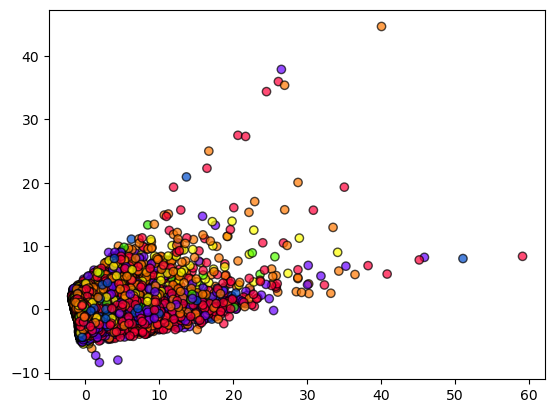

In [60]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [61]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3332657612000811
F1-score [0.16       0.08888889 0.04685573 0.1101502  0.18600563 0.26360988
 0.34217074 0.44885156 0.27808676 0.2029822 ]
              precision    recall  f1-score   support

           0       0.12      0.23      0.16        26
           1       0.08      0.10      0.09       141
           2       0.04      0.05      0.05       352
           3       0.10      0.12      0.11      1026
           4       0.18      0.20      0.19      2705
           5       0.26      0.27      0.26      6334
           6       0.34      0.34      0.34     11565
           7       0.45      0.45      0.45     14400
           8       0.29      0.27      0.28      6568
           9       0.26      0.16      0.20      1280

    accuracy                           0.33     44397
   macro avg       0.21      0.22      0.21     44397
weighted avg       0.34      0.33      0.33     44397



In [62]:
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.39489154672613014
F1-score [0.         0.07741935 0.02173913 0.06728343 0.21190765 0.3158518
 0.37958007 0.52953122 0.21372167 0.17241379]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.43      0.04      0.08       141
           2       0.25      0.01      0.02       352
           3       0.25      0.04      0.07      1026
           4       0.31      0.16      0.21      2705
           5       0.34      0.29      0.32      6334
           6       0.36      0.40      0.38     11565
           7       0.45      0.65      0.53     14400
           8       0.33      0.16      0.21      6568
           9       0.41      0.11      0.17      1280

    accuracy                           0.39     44397
   macro avg       0.31      0.19      0.20     44397
weighted avg       0.38      0.39      0.37     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


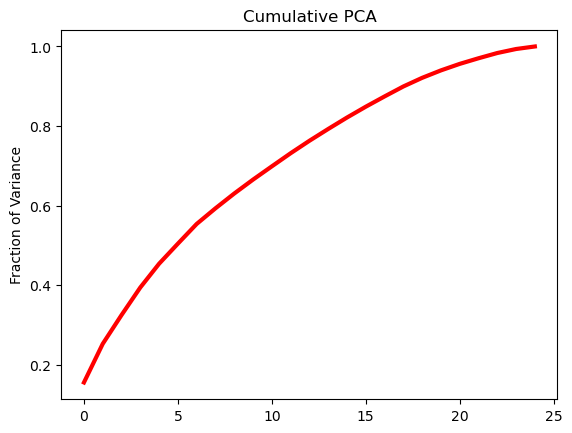

In [63]:
plt.plot(np.cumsum(PCA(n_components=25).fit(X).explained_variance_ratio_), lw=3, color='r', ms=2)
plt.title("Cumulative PCA")
plt.ylabel("Fraction of Variance")
plt.show()

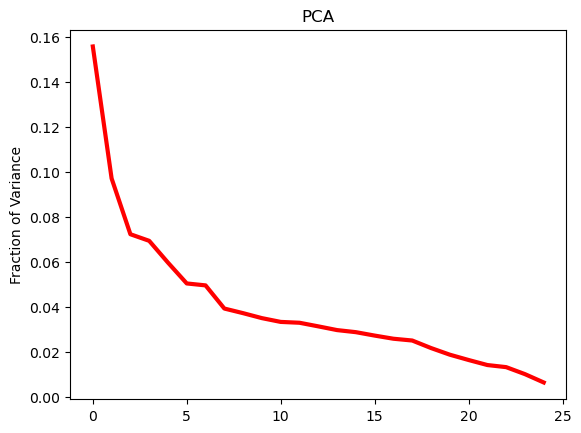

In [64]:
plt.plot(PCA(n_components=25).fit(X).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

TƯƠNG TỰ MỌI THỨ K DC CẢI THIỆN

# Random Subspace Projection

In [65]:
from sklearn import random_projection

## Test với n component = 25

In [66]:
rsp = random_projection.GaussianRandomProjection(n_components=25, random_state=None)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(103593, 25)

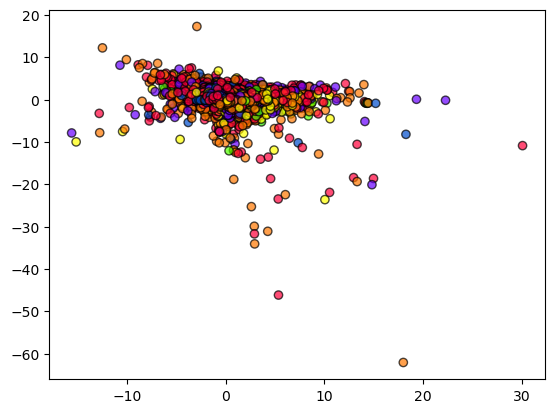

In [67]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [68]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3273644615627182
F1-score [0.1627907  0.0623053  0.03051643 0.13285133 0.17061281 0.25966893
 0.33427399 0.44136618 0.28227606 0.20721554]
              precision    recall  f1-score   support

           0       0.12      0.27      0.16        26
           1       0.06      0.07      0.06       141
           2       0.03      0.04      0.03       352
           3       0.12      0.14      0.13      1026
           4       0.16      0.18      0.17      2705
           5       0.25      0.27      0.26      6334
           6       0.33      0.34      0.33     11565
           7       0.45      0.43      0.44     14400
           8       0.30      0.27      0.28      6568
           9       0.25      0.17      0.21      1280

    accuracy                           0.33     44397
   macro avg       0.21      0.22      0.21     44397
weighted avg       0.33      0.33      0.33     44397



In [69]:
X_test_rsp = rsp.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.38917043944410656
F1-score [0.         0.07643312 0.00555556 0.0892133  0.19651741 0.30902243
 0.37528585 0.52406176 0.20425795 0.15871048]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.38      0.04      0.08       141
           2       0.12      0.00      0.01       352
           3       0.27      0.05      0.09      1026
           4       0.30      0.15      0.20      2705
           5       0.34      0.28      0.31      6334
           6       0.36      0.40      0.38     11565
           7       0.44      0.65      0.52     14400
           8       0.31      0.15      0.20      6568
           9       0.38      0.10      0.16      1280

    accuracy                           0.39     44397
   macro avg       0.29      0.18      0.19     44397
weighted avg       0.37      0.39      0.36     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KHÔNG CẢI THIỆN DC GÌ

## n components bằng 15

In [71]:
rsp = random_projection.GaussianRandomProjection(n_components=15, random_state=None)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(103593, 15)

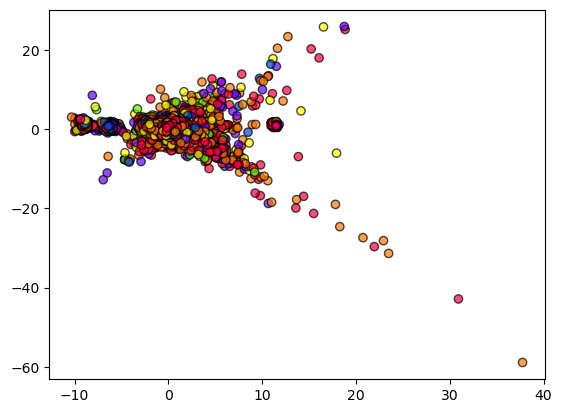

In [72]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [73]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3212379214811812
F1-score [0.06451613 0.0754717  0.03278689 0.11833823 0.17835498 0.25849403
 0.32681085 0.43627692 0.26521461 0.19722355]
              precision    recall  f1-score   support

           0       0.06      0.08      0.06        26
           1       0.07      0.09      0.08       141
           2       0.03      0.04      0.03       352
           3       0.10      0.14      0.12      1026
           4       0.17      0.19      0.18      2705
           5       0.25      0.27      0.26      6334
           6       0.32      0.33      0.33     11565
           7       0.44      0.43      0.44     14400
           8       0.28      0.25      0.27      6568
           9       0.25      0.16      0.20      1280

    accuracy                           0.32     44397
   macro avg       0.20      0.20      0.20     44397
weighted avg       0.33      0.32      0.32     44397



In [74]:
X_test_rsp = rsp.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=30) 
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.38698560713561725
F1-score [0.         0.0754717  0.         0.06424345 0.19238477 0.306427
 0.36392015 0.52700848 0.20544246 0.14716981]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.33      0.04      0.08       141
           2       0.00      0.00      0.00       352
           3       0.24      0.04      0.06      1026
           4       0.30      0.14      0.19      2705
           5       0.33      0.29      0.31      6334
           6       0.35      0.38      0.36     11565
           7       0.44      0.65      0.53     14400
           8       0.32      0.15      0.21      6568
           9       0.38      0.09      0.15      1280

    accuracy                           0.39     44397
   macro avg       0.27      0.18      0.19     44397
weighted avg       0.36      0.39      0.36     44397



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## t-SNE

In [98]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

# 10-04-2025

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Data Preparation

In [3]:
df = pd.read_csv('handlingallmissingvalues_df.csv') 

In [4]:
outliers = pd.read_csv('outlier_dataset.csv') 

In [5]:
merged_df = pd.merge(df, outliers, how='left', indicator=True)

# Lọc ra những dòng mà không có trong outliers
df_cleaned = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

In [6]:
df_cleaned = df_cleaned.drop(columns = ['originalTitle', 'averageRating'])

In [7]:
df_cleaned

,rating,startYear,endYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,totalCredits,...,castNumber,companiesNumber,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
0,"(5, 6]",1894,1895.0,1.0,0,1,10,2,0,4,...,1,3,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",9,0,1,['silent'],0,['NA'],0.0
1,"(5, 6]",1892,1893.0,12.0,0,1,10,2,0,2,...,0,0,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",3,0,1,['silent'],0,['EU'],0.0
2,"(4, 5]",1894,1895.0,1.0,0,1,10,1,0,1,...,0,1,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",4,0,1,['silent'],0,['NA'],0.0
3,"(5, 6]",1894,1895.0,1.0,1,1,10,3,0,4,...,1,6,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0,['NA'],1.0
4,"(7, 8]",1896,1897.0,1.0,0,1,10,12,0,11,...,6,5,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",21,0,2,['silent'],0,['EU'],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,"(6, 7]",1993,1994.0,96.0,0,1,10,0,0,11,...,0,2,"['\\N', 'CO']",1,1,1,['mono'],0,['SA'],0.0
149527,"(6, 7]",2019,2020.0,14.0,0,1,10,4,1,52,...,6,3,"['\\N', 'ES']",5,1,1,['stereo'],0,['EU'],0.0
149528,"(5, 6]",2019,2020.0,30.0,0,1,10,2,3,32,...,1,0,['\\N'],0,0,0,['stereo'],0,['NA'],0.0
149529,"(7, 8]",2011,2012.0,10.0,0,1,10,1,0,15,...,7,0,['\\N'],0,3,1,['stereo'],0,['NA'],0.0


## Encode

In [6]:
categorical_cols = ['titleType', 'genres', 'continent', 'regions', 'soundMixes']

# Frequency encoding
for col in categorical_cols:
    freq_enc = df_cleaned[col].value_counts(normalize=True)
    df_cleaned[col] = df_cleaned[col].map(freq_enc)

In [7]:
df_cleaned['canHaveEpisodes'] = df_cleaned['canHaveEpisodes'].replace({True: 1, False: 0})
df_cleaned['isRatable'] = df_cleaned['isRatable'].replace({True: 1, False: 0})

C:\Users\manht\AppData\Local\Temp\ipykernel_7568\3854362560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['canHaveEpisodes'] = df_cleaned['canHaveEpisodes'].replace({True: 1, False: 0})
C:\Users\manht\AppData\Local\Temp\ipykernel_7568\3854362560.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['isRatable'] = df_cleaned['isRatable'].replace({True: 1, False: 0})


In [8]:
df_cleaned['isRatable']

0         1
1         1
2         1
3         1
4         1
         ..
149526    1
149527    1
149528    1
149529    1
149530    1
Name: isRatable, Length: 147990, dtype: int64

In [9]:
rating_mapping_2 = {
    '(0, 1]': '0 - 4', 
    '(1, 2]': '0 - 4', 
    '(2, 3]': '0 - 4', 
    '(3, 4]': '0 - 4',
    '(4, 5]': '4 - 6',
    '(5, 6]': '4 - 6', 
    '(6, 7]': '6 - 7', 
    '(7, 8]': '7 - 8', 
    '(8, 9]': '8 - 9', 
    '(9, 10]': '9 - 10'
}

# Quy đổi cột 'rating' trong dataframe
df_cleaned['rating'] = df_cleaned['rating'].replace(rating_mapping_2)

In [10]:
df_cleaned

,rating,startYear,endYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,totalCredits,...,castNumber,companiesNumber,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
0,4 - 6,1894,1895.0,1.0,0,1,10,2,0,4,...,1,3,0.000007,9,0,1,0.022907,0,0.629360,0.0
1,4 - 6,1892,1893.0,12.0,0,1,10,2,0,2,...,0,0,0.000007,3,0,1,0.022907,0,0.218177,0.0
2,4 - 6,1894,1895.0,1.0,0,1,10,1,0,1,...,0,1,0.000007,4,0,1,0.022907,0,0.629360,0.0
3,4 - 6,1894,1895.0,1.0,1,1,10,3,0,4,...,1,6,0.000007,6,0,1,0.022907,0,0.629360,1.0
4,7 - 8,1896,1897.0,1.0,0,1,10,12,0,11,...,6,5,0.000007,21,0,2,0.022907,0,0.218177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,6 - 7,1993,1994.0,96.0,0,1,10,0,0,11,...,0,2,0.000365,1,1,1,0.361396,0,0.014717,0.0
149527,6 - 7,2019,2020.0,14.0,0,1,10,4,1,52,...,6,3,0.006359,5,1,1,0.553848,0,0.218177,0.0
149528,4 - 6,2019,2020.0,30.0,0,1,10,2,3,32,...,1,0,0.235246,0,0,0,0.553848,0,0.629360,0.0
149529,7 - 8,2011,2012.0,10.0,0,1,10,1,0,15,...,7,0,0.235246,0,3,1,0.553848,0,0.629360,0.0


## Data Partitioning 

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [12]:
# Tách dữ liệu thành train set và test set với tỷ lệ 70% cho train và 30% cho test
trainset, testset = train_test_split(df_cleaned, test_size=0.3, random_state=100, stratify=df_cleaned['rating'])

# Lưu các tập dữ liệu thành file CSV
trainset.to_csv('trainset.csv', index=False)
testset.to_csv('testset.csv', index=False)

print("Tập trainset và testset đã được lưu thành file CSV.")

# Sau khi đã lưu thành file, tách các đặc trưng (X) và nhãn (y)
X_train = trainset.drop(columns='rating').values  # Tách các đặc trưng từ train set
y_train = trainset['rating'].values  # Tách nhãn từ train set

X_test = testset.drop(columns='rating').values  # Tách các đặc trưng từ test set
y_test = testset['rating'].values  # Tách nhãn từ test set

# Chuẩn hóa dữ liệu bằng StandardScaler
scaler = StandardScaler()

# Chuẩn hóa X_train và X_test
X_train = scaler.fit_transform(X_train)  # Fit và transform X_train
X_test = scaler.transform(X_test)  # Chỉ transform X_test (dùng thông tin từ X_train)

# In ra kích thước của X_train, X_test, y_train, y_test để kiểm tra
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Tập trainset và testset đã được lưu thành file CSV.
X_train shape: (103593, 29)
X_test shape: (44397, 29)
y_train shape: (103593,)
y_test shape: (44397,)


## KNN Classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Tạo đối tượng KNN classifier
clf = KNeighborsClassifier(n_neighbors=50) 
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# In kết quả
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Accuracy 0.4257494875779895
F1-score [0.04673457 0.49190015 0.33222275 0.53597863 0.1819788  0.12072435]
              precision    recall  f1-score   support

       0 - 4      0.315     0.025     0.047      1545
       4 - 6      0.456     0.534     0.492      9039
       6 - 7      0.370     0.302     0.332     11565
       7 - 8      0.447     0.669     0.536     14400
       8 - 9      0.331     0.125     0.182      6568
      9 - 10      0.427     0.070     0.121      1280

    accuracy                          0.426     44397
   macro avg      0.391     0.288     0.285     44397
weighted avg      0.406     0.426     0.393     44397



In [21]:
from sklearn.model_selection import GridSearchCV

# Tạo đối tượng KNN classifier
clf = KNeighborsClassifier()

# Định nghĩa các giá trị của n_neighbors mà bạn muốn thử nghiệm
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 30, 50, 100]}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Huấn luyện GridSearchCV với dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# In kết quả của GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Dự đoán trên tập kiểm tra sử dụng mô hình với n_neighbors tối ưu
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# In kết quả
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1-score: %.3f' % f1_score(y_test, y_pred, average='weighted'))  # average='weighted' để tính F1-score tổng hợp cho các lớp
print(classification_report(y_test, y_pred, digits=3))


Best parameters found:  {'n_neighbors': 50}
Best cross-validation score: 0.423
Accuracy: 0.426
F1-score: 0.393
              precision    recall  f1-score   support

       0 - 4      0.315     0.025     0.047      1545
       4 - 6      0.456     0.534     0.492      9039
       6 - 7      0.370     0.302     0.332     11565
       7 - 8      0.447     0.669     0.536     14400
       8 - 9      0.331     0.125     0.182      6568
      9 - 10      0.427     0.070     0.121      1280

    accuracy                          0.426     44397
   macro avg      0.391     0.288     0.285     44397
weighted avg      0.406     0.426     0.393     44397



## Feature Importance

In [16]:
feature_names = df_cleaned.drop(columns='rating').columns
importances = pd.Series(clf.feature_importances_, index=feature_names)
important_features = importances.sort_values(ascending=False)

# To print all
for col, imp in important_features.items():
    print(f"{col}: {imp:.5f}")

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

DO TRONG KNN KHÔNG THỂ TÍNH FEATURE IMPORTANCE THEO DT NÊN PHẢI ỨNG DỤNG PP KHÁC

In [ ]:
from sklearn.inspection import permutation_importance

# Huấn luyện mô hình KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# Tính toán độ quan trọng của các đặc trưng sử dụng permutation importance
results = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=100)

# Tạo một Series để lưu trữ độ quan trọng
importances = pd.Series(results.importances_mean, index=feature_names)
important_features = importances.sort_values(ascending=False)

# In ra độ quan trọng của các đặc trưng
for col, imp in important_features.items():
    print(f"{col}: {imp:.5f}")


CHẠY LÂU QUÁ MÀ K RA => SKIP

## Feature Selection 

In [23]:
np.histogram(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])

(array([ 3,  0,  0,  0,  0,  0,  0,  0,  0, 26], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

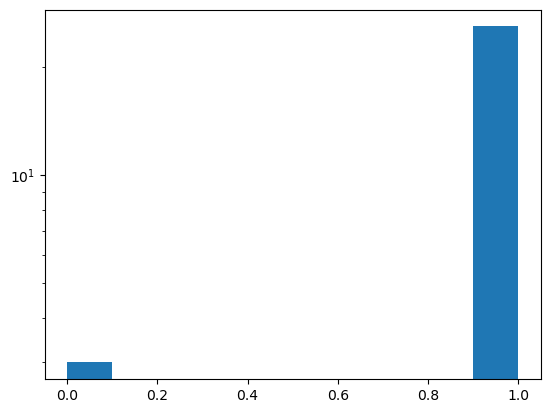

In [15]:
plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14])
plt.yscale('log')
plt.show()

### Chọn phương sai ở mức 1

In [24]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 1)
X_train_sel = sel.fit_transform(X_train)
X_test_sel = sel.transform(X_test)

X_train.shape, X_train_sel.shape, X_test_sel.shape

((103593, 29), (103593, 10), (44397, 10))

In [26]:
clf = KNeighborsClassifier(n_neighbors=50) 
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.40437416942586213
F1-score [0.02109181 0.44384388 0.32033819 0.52327979 0.12995094 0.09735744]
              precision    recall  f1-score   support

       0 - 4      0.254     0.011     0.021      1545
       4 - 6      0.419     0.472     0.444      9039
       6 - 7      0.351     0.295     0.320     11565
       7 - 8      0.429     0.670     0.523     14400
       8 - 9      0.304     0.083     0.130      6568
      9 - 10      0.443     0.055     0.097      1280

    accuracy                          0.404     44397
   macro avg      0.366     0.264     0.256     44397
weighted avg      0.382     0.404     0.366     44397



Accuracy giảm => mất nhiều dữ liệu quá, giảm quy tác chọn xuống 0.9

In [27]:
sel = VarianceThreshold(threshold = 0.9)
X_train_sel = sel.fit_transform(X_train)
X_test_sel = sel.transform(X_test)

X_train.shape, X_train_sel.shape, X_test_sel.shape

((103593, 29), (103593, 26), (44397, 26))

In [28]:
clf = KNeighborsClassifier(n_neighbors=50) 
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.4257494875779895
F1-score [0.04673457 0.49190015 0.33222275 0.53599354 0.18195871 0.12072435]
              precision    recall  f1-score   support

       0 - 4      0.315     0.025     0.047      1545
       4 - 6      0.456     0.534     0.492      9039
       6 - 7      0.370     0.302     0.332     11565
       7 - 8      0.447     0.669     0.536     14400
       8 - 9      0.331     0.125     0.182      6568
      9 - 10      0.427     0.070     0.121      1280

    accuracy                          0.426     44397
   macro avg      0.391     0.288     0.285     44397
weighted avg      0.406     0.426     0.393     44397



Accuracy vẫn giữ nguyên

### Univariate Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
### Test k =15

In [31]:
sel = SelectKBest(k=15)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(103593, 15)

In [32]:
sel.scores_

array([1229.74331888, 1233.10925776,  920.26231359,   24.55404796,
                 nan,           nan,    3.63337034,    6.69373772,
         97.84975932,  233.05583045, 1868.85986749,   51.13290965,
         41.65421438,           nan,  137.25116193,  757.5822209 ,
        123.35386389,    4.07216216,    3.63804922,   23.02215944,
         28.41182747, 1617.9129948 ,   87.18811417,  145.73568181,
         14.70579754,  864.90814499,   79.53407822,  422.96281403,
         60.81980364])

In [33]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.4176183075433025
F1-score [0.01875    0.47911383 0.32679614 0.53009933 0.16331071 0.11473272]
              precision    recall  f1-score   support

       0 - 4      0.273     0.010     0.019      1545
       4 - 6      0.450     0.512     0.479      9039
       6 - 7      0.366     0.295     0.327     11565
       7 - 8      0.438     0.671     0.530     14400
       8 - 9      0.303     0.112     0.163      6568
      9 - 10      0.346     0.069     0.115      1280

    accuracy                          0.418     44397
   macro avg      0.363     0.278     0.272     44397
weighted avg      0.393     0.418     0.383     44397



Accuracy giảm => tăng k 

In [34]:
sel = SelectKBest(k=25)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(103593, 25)

In [35]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.42739374282046083
F1-score [0.04321729 0.49305697 0.333001   0.537956   0.18807188 0.12165775]
              precision    recall  f1-score   support

       0 - 4      0.298     0.023     0.043      1545
       4 - 6      0.458     0.534     0.493      9039
       6 - 7      0.369     0.303     0.333     11565
       7 - 8      0.449     0.671     0.538     14400
       8 - 9      0.341     0.130     0.188      6568
      9 - 10      0.421     0.071     0.122      1280

    accuracy                          0.427     44397
   macro avg      0.389     0.289     0.286     44397
weighted avg      0.408     0.427     0.394     44397



TĂNG KHÔNG ĐÁNG KỂ

### Recursive Feature Elimination
RFE có thể không thích hợp với thuật toán KNeighborsClassifier khi n_neighbors lớn, vì các điểm hàng xóm gần kề sẽ không giúp ích gì cho việc tính toán trọng số đặc trưng.

In [36]:
from sklearn.feature_selection import RFE

In [ ]:
# Test k = 15
sel = RFE(DecisionTreeClassifier(), n_features_to_select=15)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

### Select form model

In [37]:
from sklearn.feature_selection import SelectFromModel

KNeighborsClassifier không có phương thức feature_importances_, vì vậy không thể sử dụng SelectFromModel trực tiếp với KNN.

## Feature Projection

### PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=25)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [40]:
X_train_pca.shape

(103593, 25)

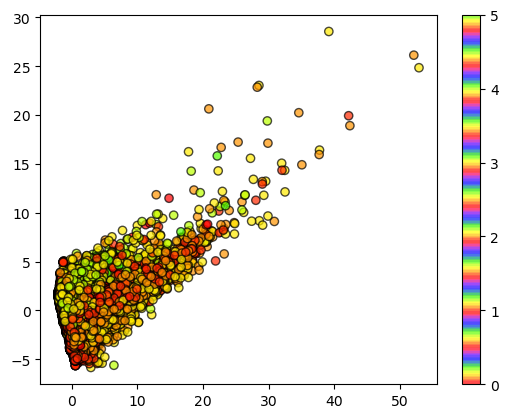

In [43]:
rating_mapping = {
    '0 - 4': 0,
    '4 - 6': 1,
    '6 - 7': 2,
    '7 - 8': 3,
    '8 - 9': 4,
    '9 - 10': 5
}

# Ánh xạ y_train thành các giá trị số
y_train_numeric = np.array([rating_mapping[val] for val in y_train])

# Vẽ scatter plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_numeric, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Thêm thanh màu để giải thích các màu sắc
plt.colorbar()

# Hiển thị đồ thị
plt.show()

In [42]:
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=50) 
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42570443948915465
F1-score [0.04673457 0.49184838 0.33208014 0.53603829 0.18191853 0.12072435]
              precision    recall  f1-score   support

       0 - 4       0.31      0.03      0.05      1545
       4 - 6       0.46      0.53      0.49      9039
       6 - 7       0.37      0.30      0.33     11565
       7 - 8       0.45      0.67      0.54     14400
       8 - 9       0.33      0.13      0.18      6568
      9 - 10       0.43      0.07      0.12      1280

    accuracy                           0.43     44397
   macro avg       0.39      0.29      0.28     44397
weighted avg       0.41      0.43      0.39     44397



GIÁ TRỊ TĂNG NHƯNG KHÔNG ĐÁNG KỂ

In [45]:
X = df_cleaned.drop(columns='rating').values
scaler = StandardScaler()
X = scaler.fit_transform(X)

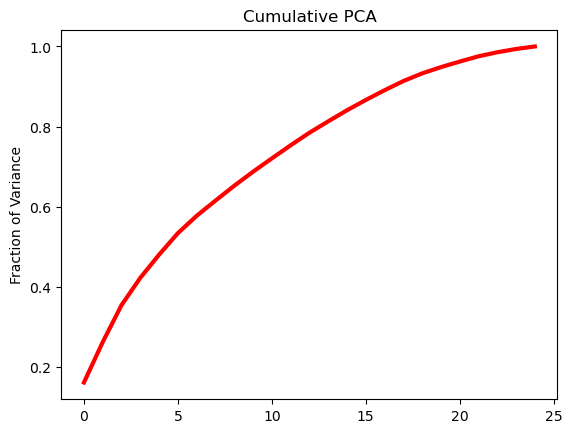

In [46]:
plt.plot(np.cumsum(PCA(n_components=25).fit(X).explained_variance_ratio_), lw=3, color='r', ms=2)
plt.title("Cumulative PCA")
plt.ylabel("Fraction of Variance")
plt.show()

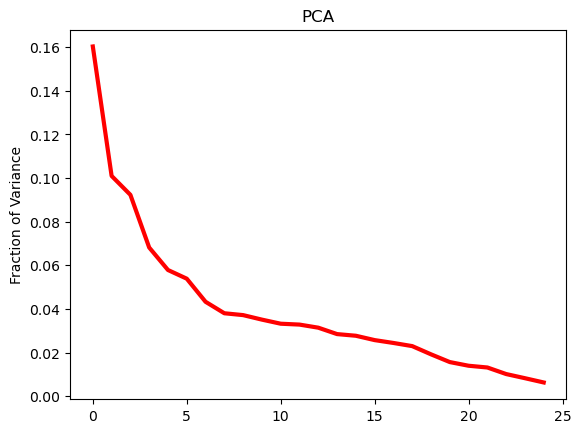

In [47]:
plt.plot(PCA(n_components=25).fit(X).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

## rANDOM SUBSPACE PROJECTION

In [48]:
from sklearn import random_projection

### Test với n component = 25

In [49]:
rsp = random_projection.GaussianRandomProjection(n_components=25, random_state=None)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(103593, 25)

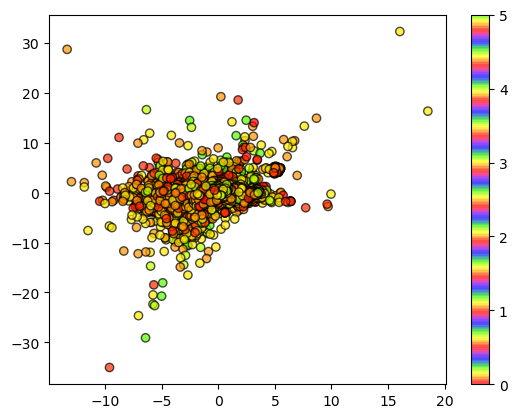

In [51]:
rating_mapping = {
    '0 - 4': 0,
    '4 - 6': 1,
    '6 - 7': 2,
    '7 - 8': 3,
    '8 - 9': 4,
    '9 - 10': 5
}

# Ánh xạ y_train thành các giá trị số
y_train_numeric = np.array([rating_mapping[val] for val in y_train])

# Vẽ scatter plot với các giá trị số đã ánh xạ cho y_train
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train_numeric, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Thêm thanh màu để giải thích các màu sắc
plt.colorbar()

# Hiển thị đồ thị
plt.show()

In [52]:
X_test_rsp = rsp.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=50) 
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4241277563799356
F1-score [0.0399274  0.48685819 0.32943192 0.53682806 0.18045113 0.11300204]
              precision    recall  f1-score   support

       0 - 4       0.31      0.02      0.04      1545
       4 - 6       0.45      0.53      0.49      9039
       6 - 7       0.37      0.30      0.33     11565
       7 - 8       0.45      0.67      0.54     14400
       8 - 9       0.33      0.12      0.18      6568
      9 - 10       0.44      0.06      0.11      1280

    accuracy                           0.42     44397
   macro avg       0.39      0.28      0.28     44397
weighted avg       0.40      0.42      0.39     44397



ACCURACY GIẢM

### TSNE  

In [14]:
from sklearn.manifold import TSNE

In [15]:
import plotly.express as px
import plotly.io as pio

In [ ]:
perplexity = np.arange(20, 50, 10)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

CHẠY QUÁ LÂU K RA KQUA

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

### Sammon mapping

In [16]:
!pip install sammon-mapping

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sammon-mapping: filename=sammon_mapping-0.0.2-py3-none-any.whl size=3592 sha256=2e2db4d516daf3bebf2762fb38e303adb91d90acc85a575d658500bfc2039053
  Stored in directory: c:\users\manht\appdata\local\pip\cache\wheels\f8\83\2e\e1808491907660dbf8a135d23d1976e346fd3f4cb93609793b
Successfully built sammon-mapping


In [17]:
from sammon.sammon import sammon

In [18]:
X_train_sammon, stress = sammon(X_train, n = 2)
X_train_sammon.shape

MemoryError: Unable to allocate 80.0 GiB for an array with shape (103593, 103593) and data type float64